1. First we select the main topics related to our goal by clustering the papers.
2. From all the selected clusters, we select the most relevant papers.

# 1. Setup

## 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import copy

#--- Reduce the non-necessary words
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer #convert text to matrix number
from sklearn import cluster #group keywords

## 1.2 Define Object Paper and Cluster

### 1.2.1 Paper

In [2]:
class Paper:
    def __init__(self, name, type, material, keywords, country, year, abstract, prediction_score = None, score = 0):
        self.name = name  
        self.year = year 
        self.keywords = keywords 
        self.type = type  
        self.material = material 
        self.country = country 
        self.abstract = abstract
        self.prediction_score = None
        self.score = score
        


    def get_name(self):
        return self.name
    def get_type(self):
        return self.type
    def get_year(self):
        return self.year 
    def get_keywords(self):
        return self.keywords 
    def get_material(self):
        return self.type
    def get_country(self):
        return self.country
    def get_abstract(self):
        return self.abstract
    def get_score(self):
        return self.score
    def get_prediction_score(self):
        return self.prediction_score

    def set_keywords(self, keywords):
        self.keywords = keywords
    def set_prediction_score(self, score):
        self.prediction_score = score
    def set_score(self,score):
        self.score = score


### 1.2.2 Cluster

In [3]:
class Cluster_group():
    def __init__(self, list_paper, ntop =6, score = 0, name = None):
        self.list_paper = list_paper
        self.name = name 
        self.list_keywords = []
        self.ntop = ntop
        self.score = score
        
    def get_list_paper(self):
        return self.list_paper
    def get_list_keywords(self):
        return self.list_keywords
    def get_npapers(self):
        return len(self.list_paper)
    def get_score(self):
        return(self.score)

    def set_score(self, score):
        self.score = score
        

    def get_tops_keyword(self):
        
        def tokenizer(keyword):
            stemmer = PorterStemmer()
            #normalize words of string into a list and into its natural roof
            return [stemmer.stem(w) for w in keyword.split(' ')]

        for paper in self.list_paper:
            self.list_keywords += (tokenizer(paper.get_keywords()))

        #--- Stopword analysis
        stop_words = stopwords.words('english')
        stop_words.append("digital")
        stop_words.append("twin")
        stop_words.append("digit")
        

        copy_list_keywords = copy.deepcopy(self.list_keywords)

        for i in range(len(copy_list_keywords)):
            for j in range(len(stop_words)):

                if copy_list_keywords[i] == stop_words[j]:
                    self.list_keywords.remove(stop_words[j])                    
        
        df = pd.value_counts(np.array(self.list_keywords))

        if len(df) < self.ntop:
            for i in range(len(df)):
                print("Index: ", df.index[i], "| Frequency: ", df.values[i])
        else:
            for i in range(self.ntop):
                print("Index: ", df.index[i], "| Frequency: ", df.values[i])

## 1.3 Import CSV and create paper objects

In [4]:
papers_list = []

# Trying with CSV from Python and not Pandas
with open("scopus recent.csv", encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',') #object in the memory
    row_counter = 0

    #iterate for each row of the CSV file
    for row in csv_reader:
        if row_counter != 0:
            new_paper = Paper(name = row[0], type = "academic", year = row[1], country = row[4], material =  row[8], keywords = row[10], abstract= row[5])
            papers_list.append(new_paper)

        row_counter += 1


## 1.4 Cleaning the Data

In [5]:
#-- Loop for each paper
for paper in papers_list:
    #-- Loop for each string in keyword
    keyword_list = list(paper.get_keywords())
    for i in range(len(keyword_list)):
        if keyword_list[i] == ';':
            keyword_list[i] = ''
    
    paper.set_keywords(''.join(keyword_list))
    

## 1.5 Setup of Stemmer, Tokenizer, Stop-words

### 1.5.1 Define Stemmer and Stop-words

In [6]:
stemmer = PorterStemmer()
stop_words = stopwords.words('english')
stop_words.append("digital")
stop_words.append("twin")
stop_words.append("digit")


### 1.5.2 Define Tokenizer

In [7]:
def tokenizer(keyword):
    #normalize words of string into a list and into its natural roof
    return [stemmer.stem(w) for w in keyword.split(' ')]

# 2. Clustering

## 2.1 Vectorizer Data

In [8]:
#Get all the keywords in put it into a new list
papers_keywords_list = []
for i in range(len(papers_list)):
    papers_keywords_list.append(papers_list[i].get_keywords())


### With stop-words

In [9]:
tfidf_simpler = TfidfVectorizer(tokenizer=tokenizer, stop_words=stop_words)
data_vectorized_simpler = tfidf_simpler.fit_transform(papers_keywords_list).toarray()
X_data_frame = pd.DataFrame(data_vectorized_simpler, index=papers_keywords_list, columns=tfidf_simpler.get_feature_names())


c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
print(X_data_frame)

                                                           %    &  'current  \
Ambulances Cities Cloud Computing Emergency Med...  0.0  0.0  0.0       0.0   
Decision making Scheduling Urban growth Collabo...  0.0  0.0  0.0       0.0   
Carbon dioxide Coal Cooling Emission control En...  0.0  0.0  0.0       0.0   
Information use Affordance theories Affordances...  0.0  0.0  0.0       0.0   
Collaborative filtering Data sparsity Digital t...  0.0  0.0  0.0       0.0   
...                                                 ...  ...  ...       ...   
Architectural design Commerce Computer aided en...  0.0  0.0  0.0       0.0   
Composite structures Information management Str...  0.0  0.0  0.0       0.0   
Complex networks Iterative methods Optimization...  0.0  0.0  0.0       0.0   
                                                    1.0  0.0  0.0       0.0   
Application programs Hybrid systems Model predi...  0.0  0.0  0.0       0.0   

                                                   

## 2.2 Clustering 

In [11]:
clustering = cluster.AffinityPropagation()

Create the prediction and assigning a "serial number" of cluster to each paper

In [12]:
clustering_prediction = clustering.fit_predict(X_data_frame)
print(clustering_prediction)

c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


[  4 302 338 ... 356 207 327]


In [13]:
print("Number of clusters = ", clustering_prediction.max())

Number of clusters =  356


Give the score ("serial number") for each paper object

In [31]:
for i in range(len(clustering_prediction)):
    papers_list[i].set_prediction_score(clustering_prediction[i])

### 2.2.1 Creating cluster objects

In [15]:
#-- Creating cluster objects
cluster_list = []
for nclusters in range(len(clustering_prediction)):
    similar_papers_list = []
    for i in range(len(clustering_prediction)):
        if clustering_prediction[i] == nclusters:
            similar_papers_list.append(papers_list[i])
    cluster_list.append(Cluster_group(similar_papers_list))

Show the most relevant keywords for each cluster

In [16]:
X_serial_number = []
Y_number_papers = []
for nclusters in range(len(cluster_list)):
    if cluster_list[nclusters].get_npapers() != 0:
        X_serial_number.append(nclusters)
        Y_number_papers.append(cluster_list[nclusters].get_npapers())

        print("============================")
        print("Serial Number = ", nclusters)
        print("--- Number of papers = ", cluster_list[nclusters].get_npapers())
        print()
        cluster_list[nclusters].get_tops_keyword()
        print("============================")
        print()

Serial Number =  0
--- Number of papers =  9

Index:  electr | Frequency:  25
Index:  model | Frequency:  15
Index:  magnet | Frequency:  14
Index:  motor | Frequency:  14
Index:  drive | Frequency:  13
Index:  perman | Frequency:  12

Serial Number =  1
--- Number of papers =  7

Index:  mill | Frequency:  20
Index:  model | Frequency:  16
Index:  dynam | Frequency:  13
Index:  vibrat | Frequency:  10
Index:  strip | Frequency:  7
Index:  analysi | Frequency:  7

Serial Number =  2
--- Number of papers =  16

Index:  machin | Frequency:  39
Index:  learn | Frequency:  39
Index:  system | Frequency:  16
Index:  model | Frequency:  14
Index:  industri | Frequency:  13
Index:  intellig | Frequency:  11

Serial Number =  3
--- Number of papers =  7

Index:  healthcar | Frequency:  14
Index:  health | Frequency:  6
Index:  model | Frequency:  5
Index:  care | Frequency:  5
Index:  system | Frequency:  4
Index:  servic | Frequency:  4

Serial Number =  4
--- Number of papers =  6

Index:  a

Show the number of papers per cluster

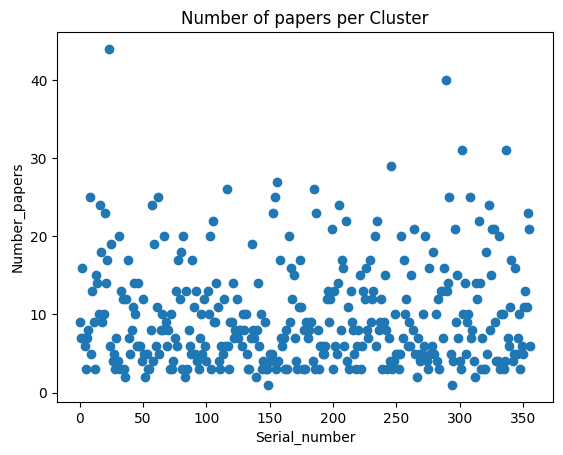

In [17]:
plt.scatter(X_serial_number, Y_number_papers)
plt.title("Number of papers per Cluster")
plt.xlabel("Serial_number")
plt.ylabel("Number_papers")
plt.show()

# 3. Targeting

## 3.1 Choose required keywords and Thresholders

In [18]:
selected_clusters = []
threshold = 0.06
required_keywords = "shop floor forecasting model generation process mining sustainability architecture framework discrete event simulation manufacturing production"
required_keywords_roots = tokenizer(required_keywords)

print(required_keywords_roots)

['shop', 'floor', 'forecast', 'model', 'gener', 'process', 'mine', 'sustain', 'architectur', 'framework', 'discret', 'event', 'simul', 'manufactur', 'product']


## 3.2 Assign a score for each cluster

In [19]:
Y_score = []
Y_counter = []

for clusters in cluster_list:
    clusters_keyword = clusters.get_list_keywords()
    if len(clusters_keyword) != 0:
        counter = 0
        for key in clusters_keyword:
            for required_key in required_keywords_roots:
                if key == required_key:
                    counter+=1
        score = counter / len(clusters_keyword)
        clusters.set_score(score)
        
        if score == 1:
            score = 0

        Y_score.append(score)
        Y_counter.append(counter)


        # print("score: ", score)
        # print("counter: ", counter)
        # print("N Keywords: ", len(clusters_keyword))
        # print("=====")

Show the score of each cluster

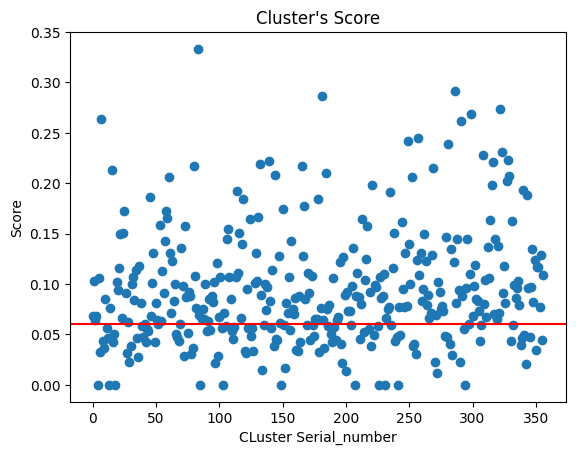

In [20]:
plt.scatter(X_serial_number, Y_score)
plt.axhline(y=threshold, color = 'r', linestyle = '-')
plt.title("Cluster's Score")
plt.xlabel("CLuster Serial_number")
plt.ylabel("Score")
plt.show()

Show the counter for each cluster

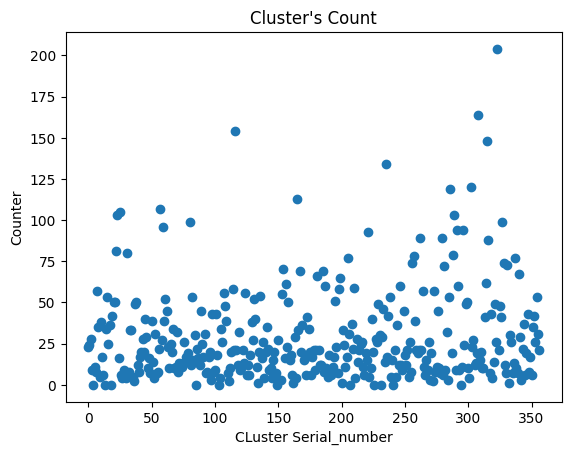

In [21]:
plt.scatter(X_serial_number, Y_counter)
plt.title("Cluster's Count")
plt.xlabel("CLuster Serial_number")
plt.ylabel("Counter")
plt.show()

## 3.3 Select Clusters

### What cluster should we care about?

In [22]:
selected_clusters = []
all_papers_from_selected_cluster = 0
threshold = 0.15

for clusters in cluster_list:
    if clusters.get_score() >= threshold:
        selected_clusters.append(clusters)
        all_papers_from_selected_cluster += clusters.get_npapers()



Show the number of selected clusters and the total number of papers within the clusters

In [23]:
print("=================")
print("Number of selected Cluster: ", len(selected_clusters))
print("=================")

print("Total number of papers within selected cluster: ", all_papers_from_selected_cluster)
print("=================")


Number of selected Cluster:  53
Total number of papers within selected cluster:  557


Show the papers within the selected Clusters and its keywords

In [24]:

for i in range(len(selected_clusters)):
    print("-------------------------------")
    print("number papers = ", selected_clusters[i].get_npapers())
    print("Cluster score = ", selected_clusters[i].get_score())
    for j in range(selected_clusters[i].get_npapers()):
        print("- ",selected_clusters[i].get_list_paper()[j].get_name())
    
        print("keywords = ",selected_clusters[i].get_list_paper()[j].get_keywords() )


-------------------------------
number papers =  8
Cluster score =  0.2638888888888889
-  A consistency evaluation method for digital twin models
keywords =  Analytic hierarchy process Assembly Floors Consistency Evaluation methods Model assembly Model fusion Model method Model validation Model verification Multi-disciplinary modeling Physical objects Shopfloors Industrial researchConsistency Digital twin Model validation Model verification Shop-floor
-  Modelling and online training method for digital twin workshop
keywords =  E-learning Normal distribution Online systems Digital twin aggregate Digital twin modeling Digital twin workshop Model training Model validation Model verification Modeling simulation Online training Spatiotemporal data model Training methods Aggregatesdigital twin aggregate Digital twin modelling digital twin workshop model validation online training spatio-temporal data model
-  A multi-scale modeling method for digital twin shop-floor
keywords =  Floors Digit

## 3.3 Select Papers

#### What paper within the selected cluster should we care about?

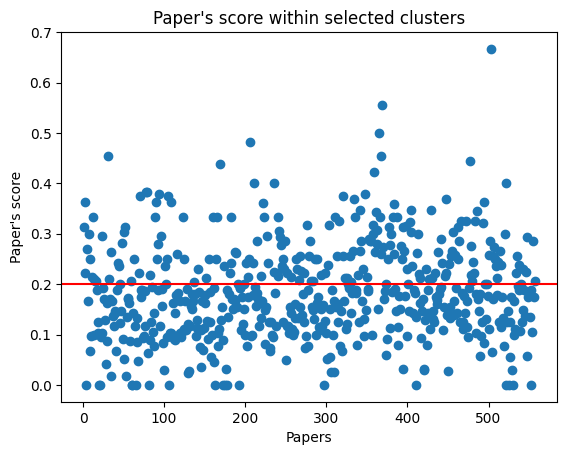

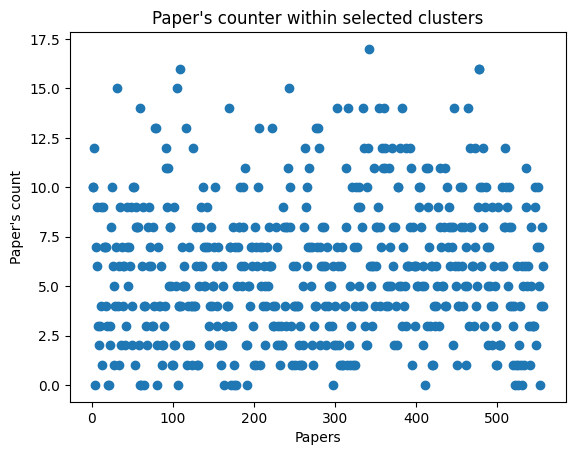

In [25]:
threshhold_paper = 0.2
Y_score_paper = []
Y_count_paper = []
X_selected_paper = []
selected_paper = []
npaper = 0
for clusters in selected_clusters:
    for paper in clusters.get_list_paper():
        npaper += 1
        paper_keywords = (tokenizer(paper.get_keywords()))
        counter_paper = 0
        for key in paper_keywords:
            for required_key in required_keywords_roots:
                    if key == required_key:
                        counter_paper+=1
        score_paper = counter_paper / len(paper_keywords)
        paper.set_score(score_paper)

        Y_score_paper.append(score_paper)
        Y_count_paper.append(counter_paper)
        X_selected_paper.append(npaper)

        if score_paper >= threshhold_paper:
            selected_paper.append(paper)

        
plt.scatter(X_selected_paper, Y_score_paper)
plt.axhline(y=threshhold_paper, color = 'r', linestyle = '-')
plt.title("Paper's score within selected clusters")
plt.xlabel("Papers")
plt.ylabel("Paper's score")
plt.show()

plt.scatter(X_selected_paper, Y_count_paper)
plt.title("Paper's counter within selected clusters")
plt.xlabel("Papers")
plt.ylabel("Paper's count")
plt.show()


Show selected papers

In [26]:
print("Number of selected papers: ", len(selected_paper))
for paper in selected_paper:
    print("----")
    print("Paper Title: ", paper.get_name())

    

    

Number of selected papers:  216
----
Paper Title:  A consistency evaluation method for digital twin models
----
Paper Title:  Modelling and online training method for digital twin workshop
----
Paper Title:  A multi-scale modeling method for digital twin shop-floor
----
Paper Title:  Multidimensional data modeling and model validation for digital twin workshop
----
Paper Title:  Theory of digital twin modeling and its application; [数字孪生模型构建理论及应用]
----
Paper Title:  Conceiving a Digital Twin for a Flexible Manufacturing System
----
Paper Title:  The digital twin in Industry 4.0: A wide-angle perspective
----
Paper Title:  Digitalized Automation Engineering of Industry 4.0 Production Systems and Their Tight Cooperation with Digital Twins
----
Paper Title:  Digital Twin-Assisted Controlling of AGVs in Flexible Manufacturing Environments
----
Paper Title:  Research and practice of lightweight digital twin speeding up the implementation of flexible manufacturing systems
----
Paper Title:  A

In [27]:
for i in range(len(selected_clusters)):
    print("-------------------------------")
    print("Cluster score = ", selected_clusters[i].get_score())
    for j in range(selected_clusters[i].get_npapers()):
        if selected_clusters[i].get_score() >= threshhold_paper:
            print("- ",selected_clusters[i].get_list_paper()[j].get_name())
    

-------------------------------
Cluster score =  0.2638888888888889
-  A consistency evaluation method for digital twin models
-  Modelling and online training method for digital twin workshop
-  A multi-scale modeling method for digital twin shop-floor
-  Framework for coupled digital twins in digital machining
-  Multidimensional data modeling and model validation for digital twin workshop
-  Models Meet Data: Challenges to Create Virtual Entities for Digital Twins
-  Theory of digital twin modeling and its application; [数字孪生模型构建理论及应用]
-  Digital twin system for highway traffic based on 3D GIS technology; [基于三维GIS技术的公路交通数字孪生系统]
-------------------------------
Cluster score =  0.21285140562248997
-  Conceiving a Digital Twin for a Flexible Manufacturing System
-  Digital Twin Pipeline for VDA 5050 Integration A Standardised Approach for the Automated Implementation of Flexible Production; [Digital Twin Pipeline zur VDA-5050-Integration Ein standardisierter Ansatz für die automatisiert

## 3.4 Exporting to CSV file

        self.name = name  
        self.year = year 
        self.keywords = keywords 
        self.type = type  
        self.material = material 
        self.country = country 
        self.abstract = abstract
        self.prediction_score = None
        self.score = score

            def get_name(self):
        return self.name
    def get_type(self):
        return self.type
    def get_year(self):
        return self.year 
    def get_keywords(self):
        return self.keywords 
    def get_material(self):
        return self.type
    def get_country(self):
        return self.country
    def get_abstract(self):
        return self.abstract
    def get_score(self):
        return self.score
    def get_prediction_score(self):
        return self.prediction_score

In [41]:
papers_name = []
papers_year = []
papers_keywords =[]
papers_type = []
papers_material = []
papers_country = []
papers_abstract = []
papers_cluster_number = []
papers_keywords_score = []

for paper in selected_paper:
    papers_name.append(paper.get_name())
    papers_year.append(paper.get_year())
    papers_keywords.append(paper.get_keywords())
    papers_type.append(paper.get_material())
    papers_country.append(paper.get_country())
    papers_abstract.append(paper.get_abstract())
    papers_cluster_number.append(paper.get_prediction_score())
    papers_keywords_score.append(paper.get_score())

output1 = {
    'papers_name': papers_name[:len(papers_name)//2],
    'papers_abstract': papers_abstract[:len(papers_name)//2],
    'papers_year': papers_year[:len(papers_name)//2],
    'papers_keywords': papers_keywords[:len(papers_name)//2],
    'papers_type': papers_type[:len(papers_name)//2],
    'papers_country': papers_country[:len(papers_name)//2],
    
    'papers_cluster_number': papers_cluster_number[:len(papers_name)//2],
    'papers_keywords_score': papers_keywords_score[:len(papers_name)//2]
}

output2 = {
    'papers_name': papers_name[len(papers_name)//2:],
    'papers_abstract': papers_abstract[len(papers_name)//2:],
    'papers_year': papers_year[len(papers_name)//2:],
    'papers_keywords': papers_keywords[len(papers_name)//2:],
    'papers_type': papers_type[len(papers_name)//2:],
    'papers_country': papers_country[len(papers_name)//2:],
    
    'papers_cluster_number': papers_cluster_number[len(papers_name)//2:],
    'papers_keywords_score': papers_keywords_score[len(papers_name)//2:]
}

output1_dataframe = pd.DataFrame(output1)
output2_dataframe = pd.DataFrame(output2)



In [42]:
output1_dataframe.head()

,papers_name,papers_abstract,papers_year,papers_keywords,papers_type,papers_country,papers_cluster_number,papers_keywords_score
0,A consistency evaluation method for digital tw...,Digital twin has shown its great application v...,2022,Analytic hierarchy process Assembly Floors Con...,academic,School of Automation Science and Electrical En...,7,0.312500
1,Modelling and online training method for digit...,"Aiming at the difficulties in modelling, simul...",2022,E-learning Normal distribution Online systems ...,academic,College of Mechanical and Electrical Engineeri...,7,0.222222
2,A multi-scale modeling method for digital twin...,Digital twin has attracted more and more atten...,2022,Floors Digital twin shop-floor Model assembly ...,academic,School of Automation Science and Electrical En...,7,0.363636
3,Multidimensional data modeling and model valid...,Digital twin workshop (DTW) is an important em...,2021,Digital twin Information analysis Production c...,academic,College of Mechanical and Electrical Engineeri...,7,0.269231
4,Theory of digital twin modeling and its applic...,"Digital twin is a hot point nowadays, and has ...",2021,Floors Accurate modeling Dynamic production In...,academic,School of Automation Science and Electrical En...,7,0.300000


In [43]:
output2_dataframe.head()

,papers_name,papers_abstract,papers_year,papers_keywords,papers_type,papers_country,papers_cluster_number,papers_keywords_score
0,Product family design and optimization: A digi...,Complex product family design and optimization...,2020,Condition monitoring Cost effectiveness Manufa...,academic,Department of Industrial and Systems Engineeri...,252,0.200000
1,Decision support in productive processes throu...,The use of simulation to support decision-maki...,2022,Decision making Decision support systems Discr...,academic,Production Engineering and Management Institut...,257,0.256410
2,Decision-making in a fast fashion company in t...,This work explores the improvement of operatio...,2021,Artificial intelligence Digital twin Discrete ...,academic,Production Engineering and Management Institut...,257,0.204545
3,Online prediction technology of workshop opera...,Aiming at the online prediction problem of the...,2021,Forecasting Event scheduling Online prediction...,academic,"School of Mechanical Engineering, Beijing Inst...",257,0.266667
4,The digital twin of the business process model,"In this paper, we propose a solution to the pr...",2020,Costs Critical path analysis Digital twin Fore...,academic,Reshetnev Siberian State University of Science...,257,0.368421


In [37]:
output1_dataframe.to_csv("output1.csv", index=False)
output2_dataframe.to_csv("output2.csv", index=False)